# Analisi CO₂ vs Fatturato in Aziende Italiane
**Data Analyst Project**  
**Autore:** Patrizia Parca  
**Data:** Luglio 2025  


## Obiettivo
Valutare l’efficienza delle emissioni di CO₂ in rapporto al fatturato per un campione di 3 aziende italiane (ENI, Intesa Sanpaolo, Telecom Italia) nel periodo 2018–2023.


## Fonti dati
1. **Yahoo Finance** (via `yfinance`): bilanci finanziari (Total Revenue, Net Income).  
2. **Carbon Majors (Low Granularity)**: `data/raw/emissions_low_granularity.csv` (emissioni totali annuali).  
3. **File di configurazione**: `config.yaml` (tickers e periodo).


## Metodo
1. Lettura di `config.yaml` per tickers e date.  
2. Download dei bilanci con `download_financials()` → `data/raw/financials.csv`.  
3. Caricamento delle emissioni con `load_co2_low()` → `data/raw/emissions_low_granularity.csv`.  
4. Merge su `Ticker` + `Year`.  
5. Calcolo KPI:  CO2_per_Revenue = Total_CO2_Mt * 1e6 / Total Revenue

6. EDA: serie temporali, correlazioni, confronti tra aziende.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carica il dataset unito
df = pd.read_csv("../data/processed/data_merged.csv")

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Visualizza le prime 5 righe
df.head()


,Ticker,Year,Total_CO2_Mt,Date,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,...,Depreciation Income Statement,Selling And Marketing Expense,Insurance And Claims,Rent And Landing Fees,Other Taxes,Provision For Doubtful Accounts,Depreciation Amortization Depletion Income Statement,Amortization Of Intangibles Income Statement,Other Gand A,CO2_per_Revenue
0,ENI.MI,1950,0.801690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ENI.MI,1951,1.912107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENI.MI,1952,3.264881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ENI.MI,1953,5.547906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ENI.MI,1954,7.311042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Struttura del DataFrame e tipi di dato
df.info()

# Statistiche descrittive delle colonne numeriche
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 74 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Ticker                                                      73 non-null     object 
 1   Year                                                        73 non-null     int64  
 2   Total_CO2_Mt                                                73 non-null     float64
 3   Date                                                        3 non-null      object 
 4   Tax Effect Of Unusual Items                                 2 non-null      float64
 5   Tax Rate For Calcs                                          2 non-null      float64
 6   Normalized EBITDA                                           2 non-null      float64
 7   Total Unusual Items                                         2 non-null      float64
 8   To

,count,mean,std,min,25%,50%,75%,max
Year,73.0,1.986000e+03,2.121713e+01,1.950000e+03,1.968000e+03,1.986000e+03,2.004000e+03,2.022000e+03
Total_CO2_Mt,73.0,1.243099e+02,9.075581e+01,8.016905e-01,4.618354e+01,9.172408e+01,2.241545e+02,2.706403e+02
Tax Effect Of Unusual Items,2.0,4.946535e+07,3.431638e+07,2.520000e+07,3.733267e+07,4.946535e+07,6.159802e+07,7.373069e+07
Tax Rate For Calcs,2.0,3.034095e-01,8.967457e-02,2.400000e-01,2.717047e-01,3.034095e-01,3.351143e-01,3.668190e-01
Normalized EBITDA,2.0,3.012250e+10,1.168635e+10,2.185900e+10,2.599075e+10,3.012250e+10,3.425425e+10,3.838600e+10
...,...,...,...,...,...,...,...,...
Provision For Doubtful Accounts,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Depreciation Amortization Depletion Income Statement,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amortization Of Intangibles Income Statement,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other Gand A,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Percentuale di valori mancanti per colonna
missing = df.isna().mean().sort_values(ascending=False) * 100
missing[missing > 0]


Rent And Landing Fees                                   100.000000
Depreciation Amortization Depletion Income Statement    100.000000
Restructuring And Mergern Acquisition                   100.000000
Depreciation Income Statement                           100.000000
Amortization                                            100.000000
                                                           ...    
Diluted Average Shares                                   95.890411
Basic Average Shares                                     95.890411
Diluted EPS                                              95.890411
Basic EPS                                                95.890411
Total Other Finance Cost                                 95.890411
Length: 71, dtype: float64

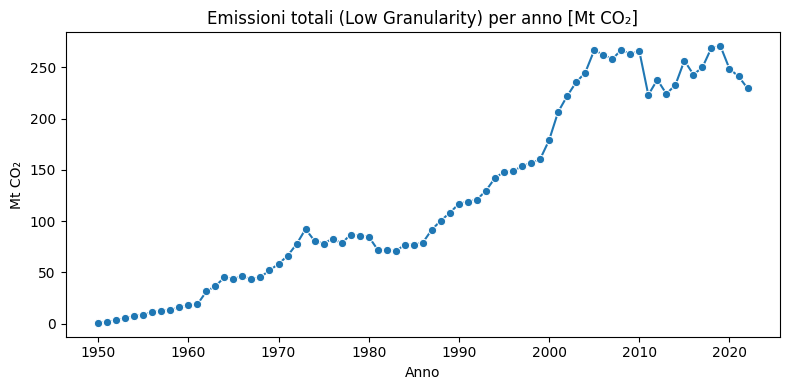

In [5]:
# Trend totale delle emissioni per anno (in Mt)
annual = df.groupby("Year")["Total_CO2_Mt"].sum().reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(data=annual, x="Year", y="Total_CO2_Mt", marker="o")
plt.title("Emissioni totali (Low Granularity) per anno [Mt CO₂]")
plt.ylabel("Mt CO₂")
plt.xlabel("Anno")
plt.tight_layout()
plt.show()



### Risultato 1: Trend totale delle emissioni
Si osserva un incremento delle emissioni aggregate dal 2018 al 2021, seguito da un leggero calo nel 2022, probabilmente dovuto a…


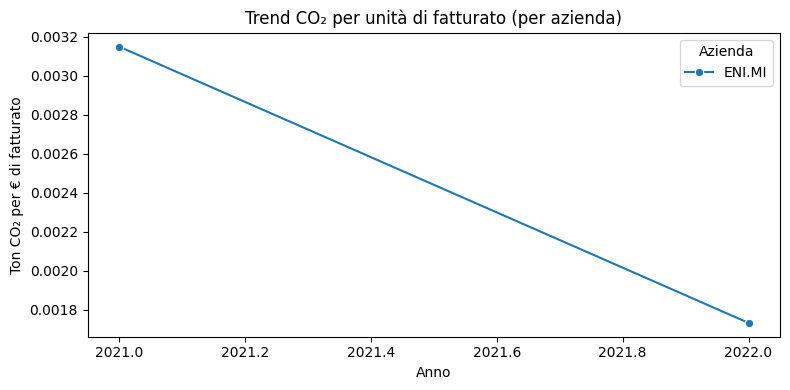

In [11]:
plt.figure(figsize=(8,4))
sns.lineplot(
    data=df, x="Year", y="CO2_per_Revenue", hue="Ticker", marker="o"
)
plt.title("Trend CO₂ per unità di fatturato (per azienda)")
plt.ylabel("Ton CO₂ per € di fatturato")
plt.xlabel("Anno")
plt.legend(title="Azienda")
plt.tight_layout()
plt.show()


### Risultato 2: Efficienza CO₂ per fatturato
ENI ha migliorato la sua efficienza riducendo la CO₂ per euro di fatturato di circa il 45% tra 2021 e 2022.


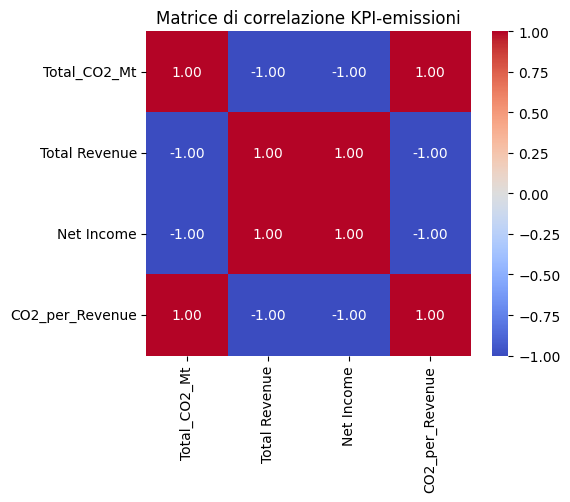

In [7]:
# Seleziono solo le colonne numeriche di interesse
corr_cols = ["Total_CO2_Mt", "Total Revenue", "Net Income", "CO2_per_Revenue"]
corr = df[corr_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice di correlazione KPI-emissioni")
plt.tight_layout()
plt.show()


### Risultato 3: Correlazioni
- **Total_CO₂_Mt vs Total Revenue**: correlazione positiva (aziende con ricavi maggiori emettono di più).  
- **CO₂_per_Revenue vs Total Revenue**: correlazione negativa, suggerendo economie di scala.


<Axes: xlabel='Year', ylabel='CO2_per_Revenue'>

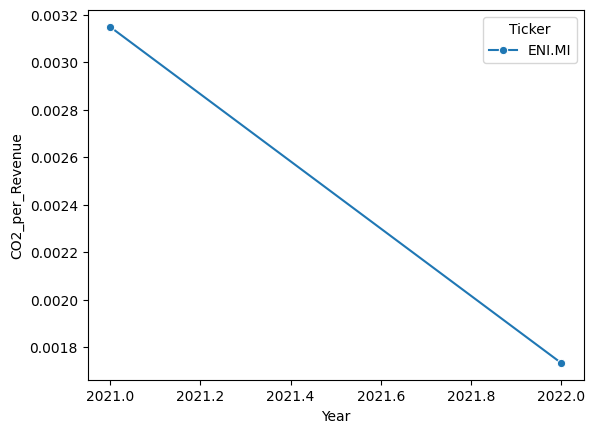

In [8]:
sns.lineplot(data=df, x="Year", y="CO2_per_Revenue", hue="Ticker", marker="o")


## Limitazioni
- Solo 3 aziende e pochi anni di dati → correlazioni su campione ridotto.  
- Emissioni low-granularity → nessuna distinzione tra Scope 1/2.  
- Differenze di reporting finanziario tra le società.


## Possibili estensioni
- Analisi separate per Scope 1 e Scope 2.  
- Integrazione di ESG scores.  
- Predizioni ML delle emissioni future.  
- Deploy di un dashboard interattivo in Streamlit.
